# Hate_Speech_Detection

# 1. Importing Libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
temp_df = pd.read_csv(r"HateSpeechDatasetBalanced.csv")
temp_df


# label 0: non hate content
# label 1: hate content

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1
...,...,...
726114,i mute this telecasting and played kanye west ...,1
726115,but hell yeah he s not a bachelor but looooooo...,1
726116,great video musician but s not my musician lol...,1
726117,not great pop video yeah he s not a pedophile ...,1


In [17]:
df = temp_df[:10000]
df.shape

(10000, 2)

# 2. EDA

In [18]:
df['Label'].value_counts()

Label
0    8558
1    1442
Name: count, dtype: int64

In [19]:
df.isnull().sum()

Content    0
Label      0
dtype: int64

In [20]:
df.duplicated().sum()

0

# 3. Data Preprocessing

In [21]:
from string import punctuation
from nltk.corpus import stopwords
stop = stopwords.words("english")
sw_list = list(punctuation) + stop

In [22]:
def text_cleaner(text):
    filtered_text = []
    from nltk.tokenize import word_tokenize
    tokenize = word_tokenize(text)
    for word in tokenize:
        if word.lower() not in sw_list:
            filtered_text.append(word)
    return " ".join(filtered_text)

In [23]:
df['Content'] = df['Content'].apply(text_cleaner)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15108\838255399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content'] = df['Content'].apply(text_cleaner)


# 4. Data Visualization

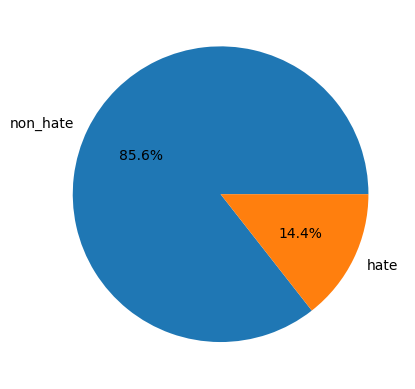

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['Label'].value_counts(), autopct='%1.1f%%', labels=['non_hate','hate'])
plt.show()

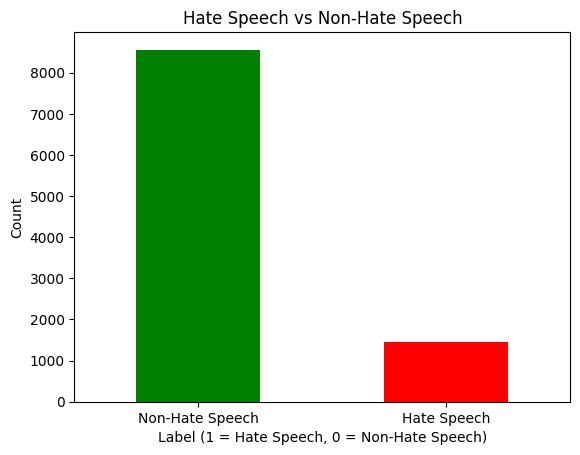

In [25]:
df['Label'].value_counts().plot(kind='bar', color=['green', 'red'],
                               title='Hate Speech vs Non-Hate Speech')
plt.xlabel('Label (1 = Hate Speech, 0 = Non-Hate Speech)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=["Non-Hate Speech", "Hate Speech"], rotation=0)
plt.show()

### Feature creation for more/better visualization

C:\Users\Acer\AppData\Local\Temp\ipykernel_15108\2166674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['Content'].apply(len)  # You can also use .apply(lambda x: len(x.split())) for word count
C:\Users\Acer\AppData\Local\Temp\ipykernel_15108\2166674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Label', y='text_length', data=df, palette=['green', 'red'])


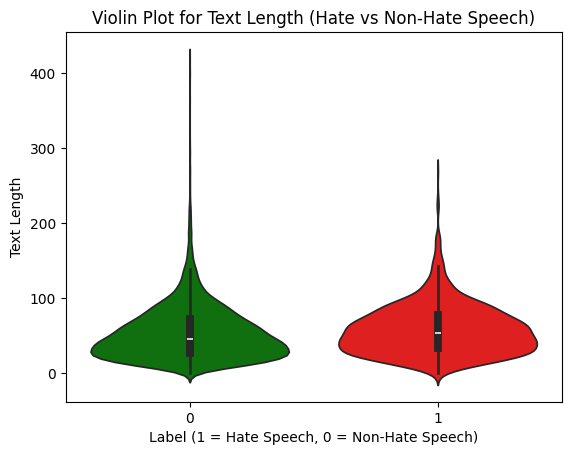

In [26]:
# Calculate text length (number of characters or words)
df['text_length'] = df['Content'].apply(len)  # You can also use .apply(lambda x: len(x.split())) for word count

# Create the violin plot for text length distribution
sns.violinplot(x='Label', y='text_length', data=df, palette=['green', 'red'])
plt.title('Violin Plot for Text Length (Hate vs Non-Hate Speech)')
plt.xlabel('Label (1 = Hate Speech, 0 = Non-Hate Speech)')
plt.ylabel('Text Length')
plt.show()


# It shows that mostly content length is between 0 to 100

In [27]:
df

,Content,Label,text_length
0,denial normal con asked comment tragedies emot...,1,58
1,able tweet insufferable bullshit proves trump ...,1,57
2,retarded cute single life,1,25
3,thought real badass mongol style declaration w...,1,79
4,afro american basho,1,19
...,...,...,...
9995,recent statewide flying campaign blanketed col...,0,157
9996,caught stories generated,0,24
9997,winning activism,0,16
9998,reply joining group hardworking smart activists,0,47


# 5. Separating X and y, encoding & train_test_split

In [28]:
# separating
X = df.iloc[:,0:1]
y = df['Label']

In [29]:
X

,Content
0,denial normal con asked comment tragedies emot...
1,able tweet insufferable bullshit proves trump ...
2,retarded cute single life
3,thought real badass mongol style declaration w...
4,afro american basho
...,...
9995,recent statewide flying campaign blanketed col...
9996,caught stories generated
9997,winning activism
9998,reply joining group hardworking smart activists


In [30]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Label, Length: 10000, dtype: int64

In [31]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## 6) Feature Extraction

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train['Content']).toarray()
X_test_bow = cv.transform(X_test['Content']).toarray()

In [33]:
print(X_train_bow.shape)
print(X_test_bow.shape)

(8000, 11455)
(2000, 11455)


## 7.) Model Building

### RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_bow, y_train)

RandomForestClassifier()

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = rf.predict(X_test_bow)  # predict test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 89.85%


### LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()

# Train the model
lr.fit(X_train_bow, y_train)

# Predict on the test set
y_pred = lr.predict(X_test_bow)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.89
Confusion Matrix:
 [[1666   35]
 [ 185  114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1701
           1       0.77      0.38      0.51       299

    accuracy                           0.89      2000
   macro avg       0.83      0.68      0.72      2000
weighted avg       0.88      0.89      0.87      2000



### Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_bow,y_train) # fitting training data

GaussianNB()

In [38]:
# predict
y_pred = gnb.predict(X_test_bow)

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6405
[[1147  554]
 [ 165  134]]
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      1701
           1       0.19      0.45      0.27       299

    accuracy                           0.64      2000
   macro avg       0.53      0.56      0.52      2000
weighted avg       0.77      0.64      0.69      2000



In [39]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Initialize BernoulliNB
bnb = BernoulliNB()

# Fit the model
bnb.fit(X_train_bow, y_train)

# Predict on test data
y_pred = bnb.predict(X_test_bow)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.856


In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize MultinomialNB
mnb = MultinomialNB()

# Fit the model
mnb.fit(X_train_bow, y_train)  # or X_train_tfidf if using TF-IDF

# Predict on test data
y_pred = mnb.predict(X_test_bow)  # or X_test_tfidf

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.877


In [41]:
# Note:

# Multinomial works best when we use BOW & TFIDF.

# MultinomialNB is used for BOW and TF-IDF because these techniques represent text as 
# word counts or frequencies (how many times a word appears), and MultinomialNB works 
# best with this type of data by modeling it as a set of counts, assuming words occur 
# in a multinomial distribution (probability of each word).

# In short, MultinomialNB is built for handling word counts, which is exactly what BOW and TF-IDF produce.

# 8. Prediction

In [42]:
new_text_bow = cv.transform(["Hello, How are you. Good to see you."]).toarray()
lr.predict(new_text_bow)

# It means it is non hate speech

array([0], dtype=int64)

# 9. Using TFIDF

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train['Content']).toarray()
X_test_tfidf = tfidf.transform(X_test['Content']).toarray()

In [44]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(8000, 11455)
(2000, 11455)


In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8695
Confusion Matrix:
 [[1696    5]
 [ 256   43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      1701
           1       0.90      0.14      0.25       299

    accuracy                           0.87      2000
   macro avg       0.88      0.57      0.59      2000
weighted avg       0.87      0.87      0.83      2000



# 10. Prediction

In [47]:
new_text_tfidf = cv.transform(["able tweet insufferable bullshit proves trump "]).toarray()
lr.predict(new_text_tfidf)

# It means it is hate speech

array([1], dtype=int64)